# Regression and Classification with the Ames Housing Data

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Estimating the value of homes from features


In [3]:
# Load the data
house = pd.read_csv('housing.csv')

In [4]:
# A:
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


## data cleaning

In [7]:
#house.info()  #to check the overall information of the dataset


In [8]:
house.MSZoning.unique()      #to list all the property types

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [9]:
houser=house[house.MSZoning>'R']  #remove non-residential properties and assign the new dataframe to houser

In [10]:
houser.MSZoning.unique()      #to check the property types remained

array(['RL', 'RM', 'RH'], dtype=object)

In [11]:
houser.shape                #to check how many rows in houser

(1385, 81)

In [12]:
houser.reset_index(inplace=True)

In [13]:
houser.index

RangeIndex(start=0, stop=1385, step=1)

In [14]:
#drop column 'Alley','FireplaceQu','PoolQC','Fence','MiscFeature' as there are very few data in each column
houser.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True) 


C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
cols=houser.columns  #to get the whole list all the remained columns

In [16]:
olist=[]    #to create a list of object columns
nlist=[]    #to create a list of numerical columns
for c in cols:
    
    if houser[c].dtype=='object':
        olist.append(c)
    else:
        nlist.append(c)

Text(0.5,1,'Average SalePrice for all the MSZoning ')

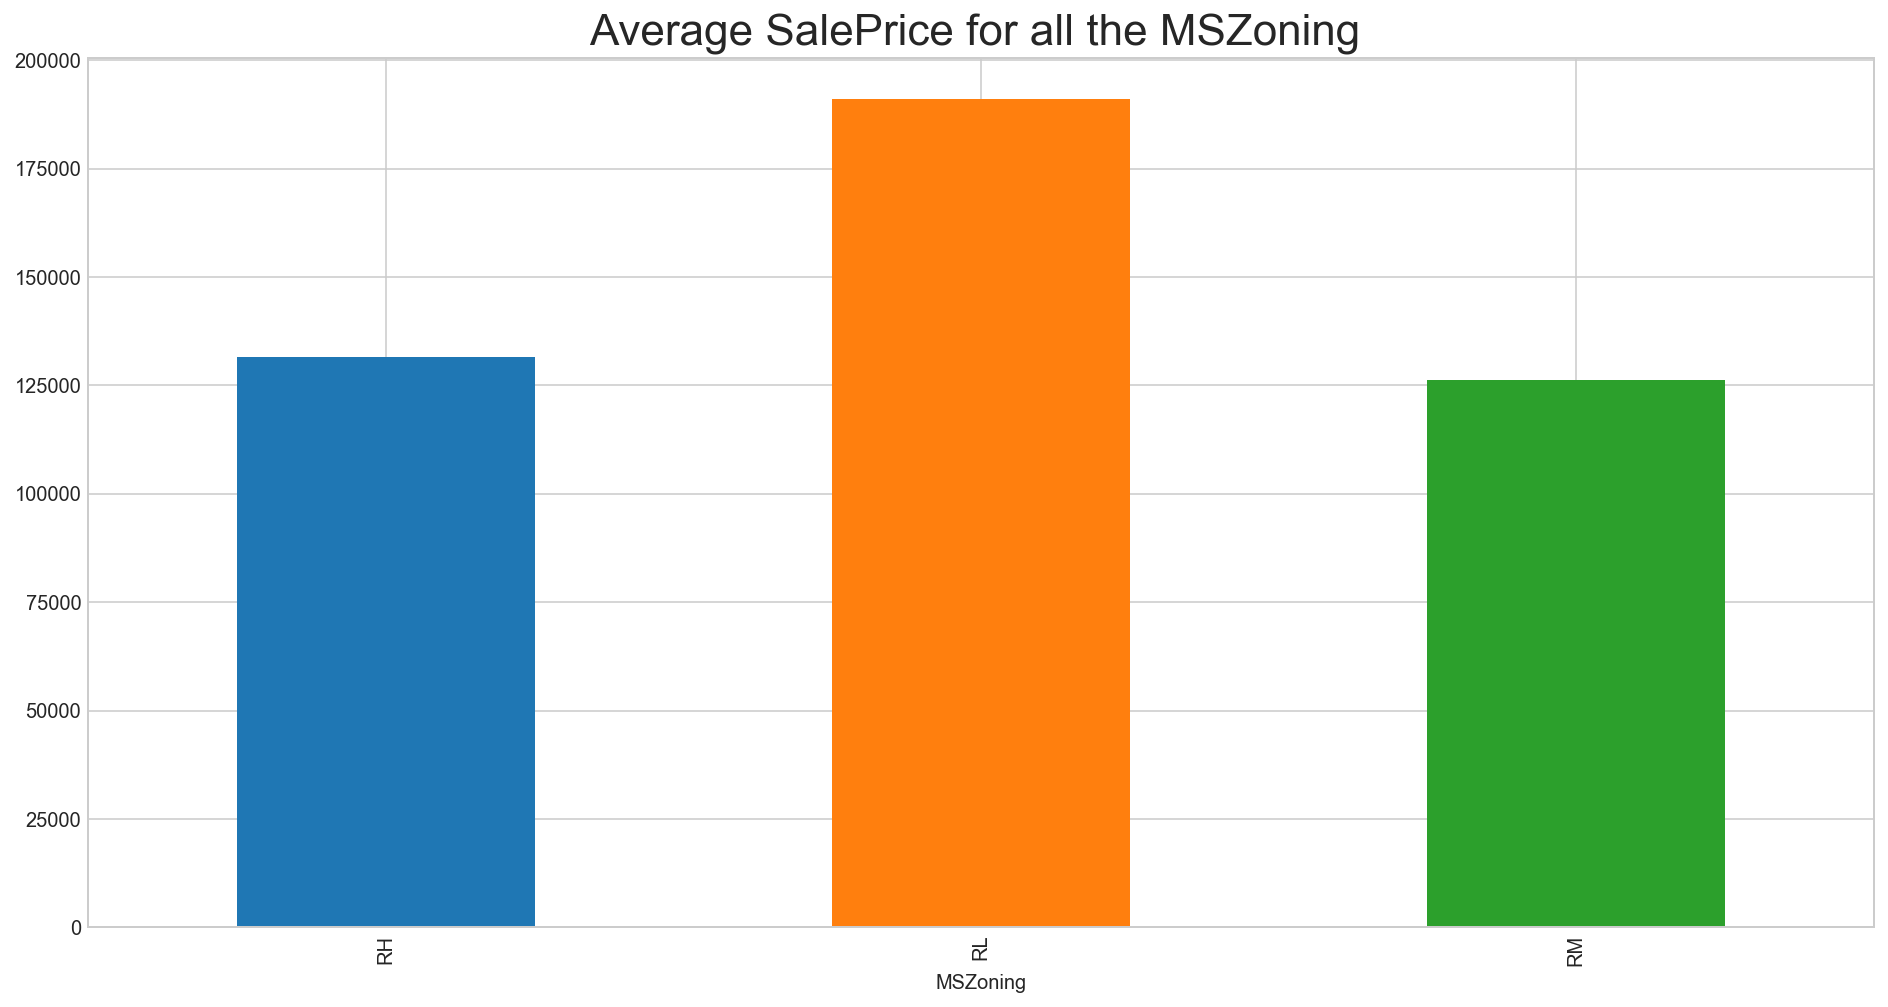

In [17]:
ax=houser.groupby('MSZoning').SalePrice.mean().plot(kind='bar', figsize=(16,8))
ax.set_title('Average SalePrice for all the MSZoning ', fontsize=22)

In [18]:
nlist.pop(-1)

'SalePrice'

In [19]:
y=houser['SalePrice']

In [20]:
X=houser[nlist]

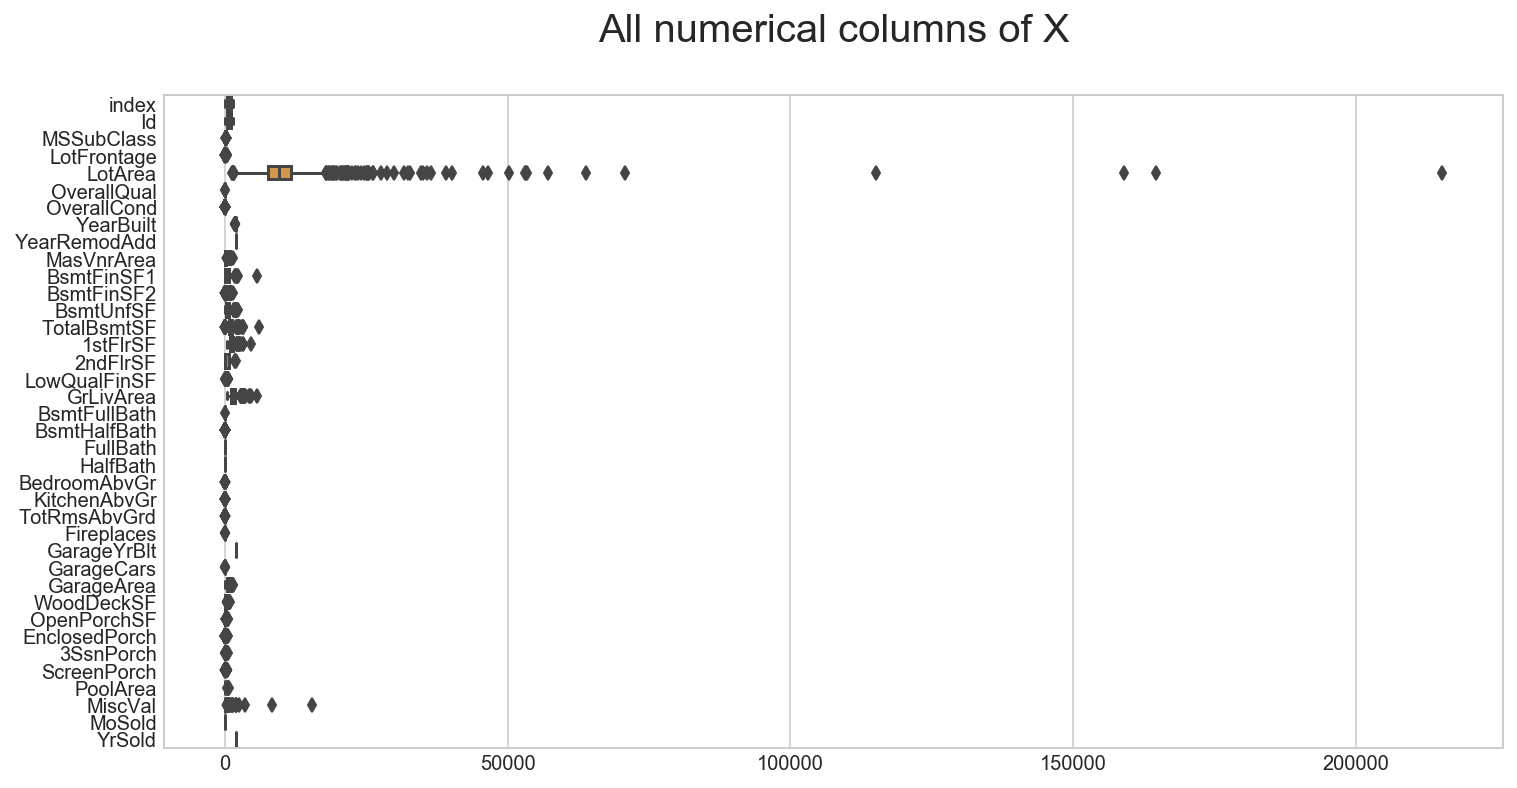

In [21]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=houser[nlist], orient='h')

ax.set_title('All numerical columns of X\n',fontsize=20)
plt.show()

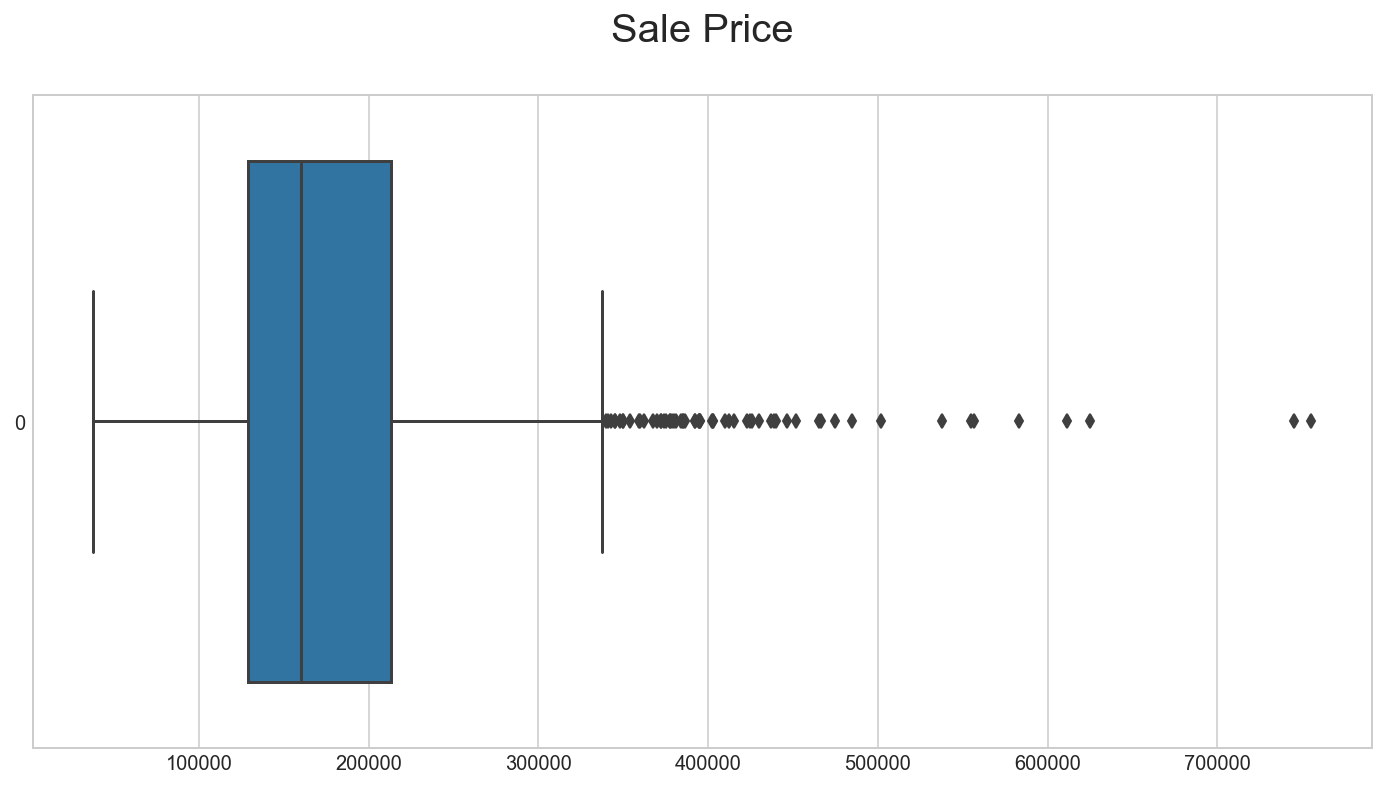

In [23]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=houser['SalePrice'], orient='h')

ax.set_title('Sale Price\n',fontsize=20)
plt.show()

In [25]:
houser.SalePrice.describe()    #to double check if there are any weird values for SalePrice

count      1385.000000
mean     180136.283032
std       79906.363281
min       37900.000000
25%      129000.000000
50%      160000.000000
75%      212900.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
houser.YrSold.max()

2010

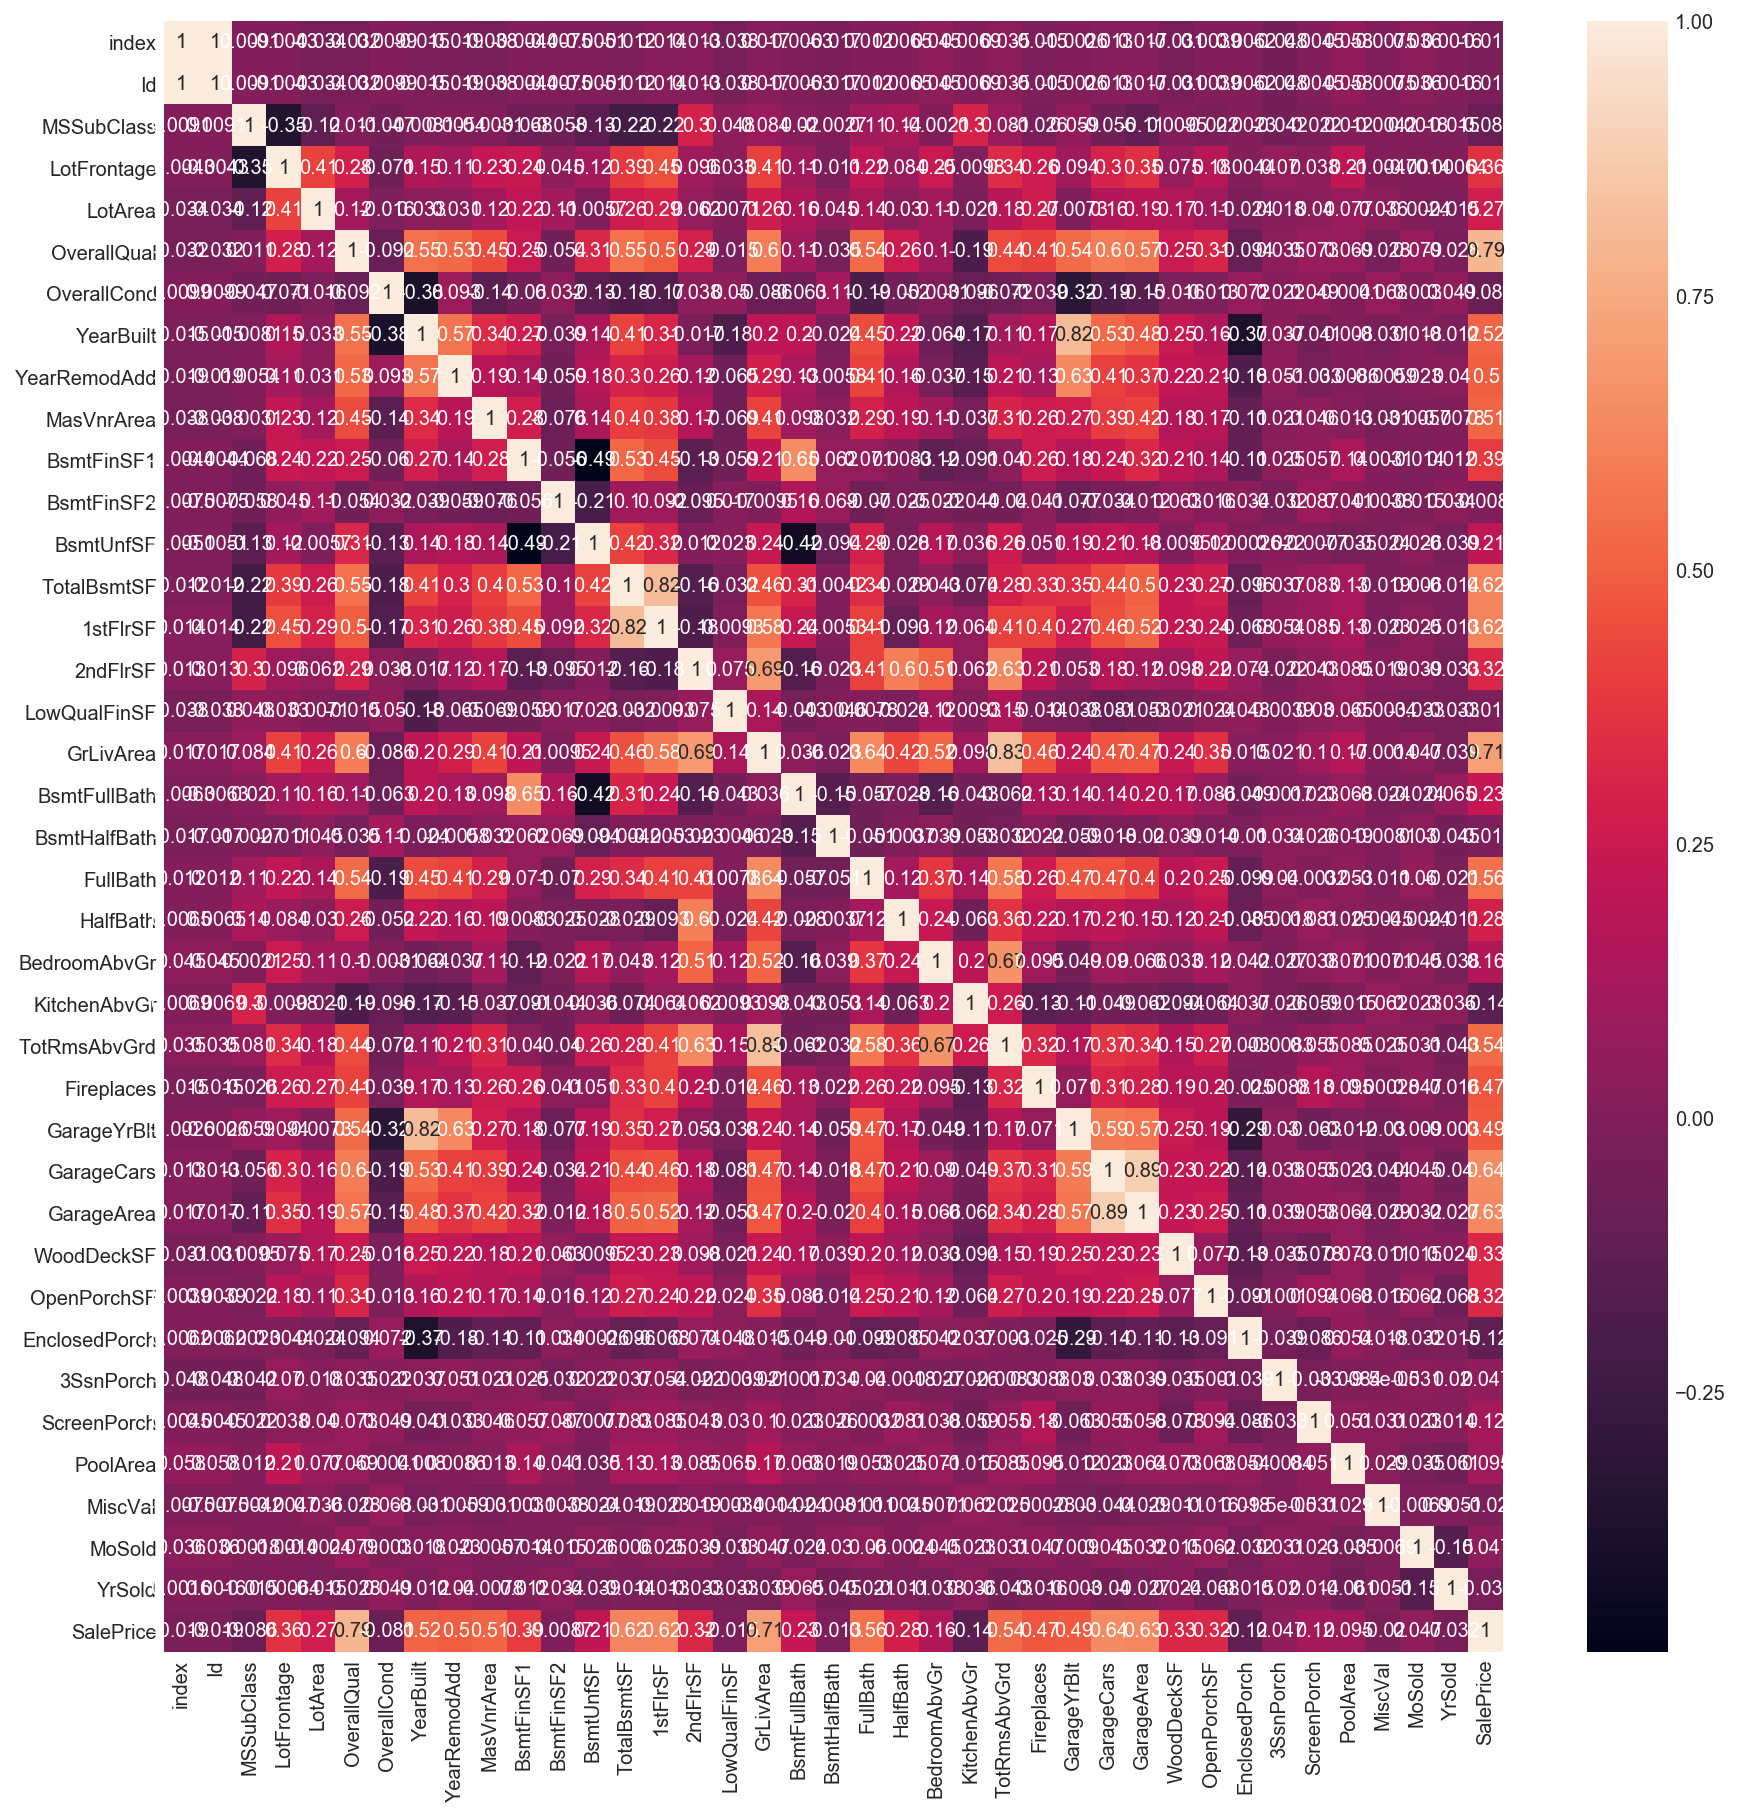

In [28]:
nlist1=nlist
nlist1.append('SalePrice')
selected=houser[nlist1]
plt.figure(figsize=(15,15))
sns.heatmap(selected.corr(), annot=True)

### The heatmap is too crouded for us to recognize between which two features or between 'SalePrice' and which feature strongest correlation is. So next step is to identify what features affect the sale price.

In [29]:
nlist.pop(-1)
print(nlist)

['index', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [30]:
corr30list=[] #list of features that its absolute correlation coefficient with SalePrice is greater than 0.3
corr40list=[] #list of features that its absolute correlation coefficient with SalePrice is greater than 0.4
corr50list=[] #list of features that its absolute correlation coefficient with SalePrice is greater than 0.5
corr60list=[] #list of features that its absolute correlation coefficient with SalePrice is greater than 0.6
for i in nlist:
    c=abs(houser[['SalePrice',i]].corr().iloc[0,1])
    if c>0.3:
        
        corr30list.append(i)
    if c>0.4:
        
        corr40list.append(i)
    if c>0.5:
        
        corr50list.append(i)
    if c>0.6:
        
        corr60list.append(i)



In [31]:
print(len(corr30list),len(corr40list),len(corr50list),len(corr60list))

18 13 10 6


In [45]:
print(corr60list)

['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']


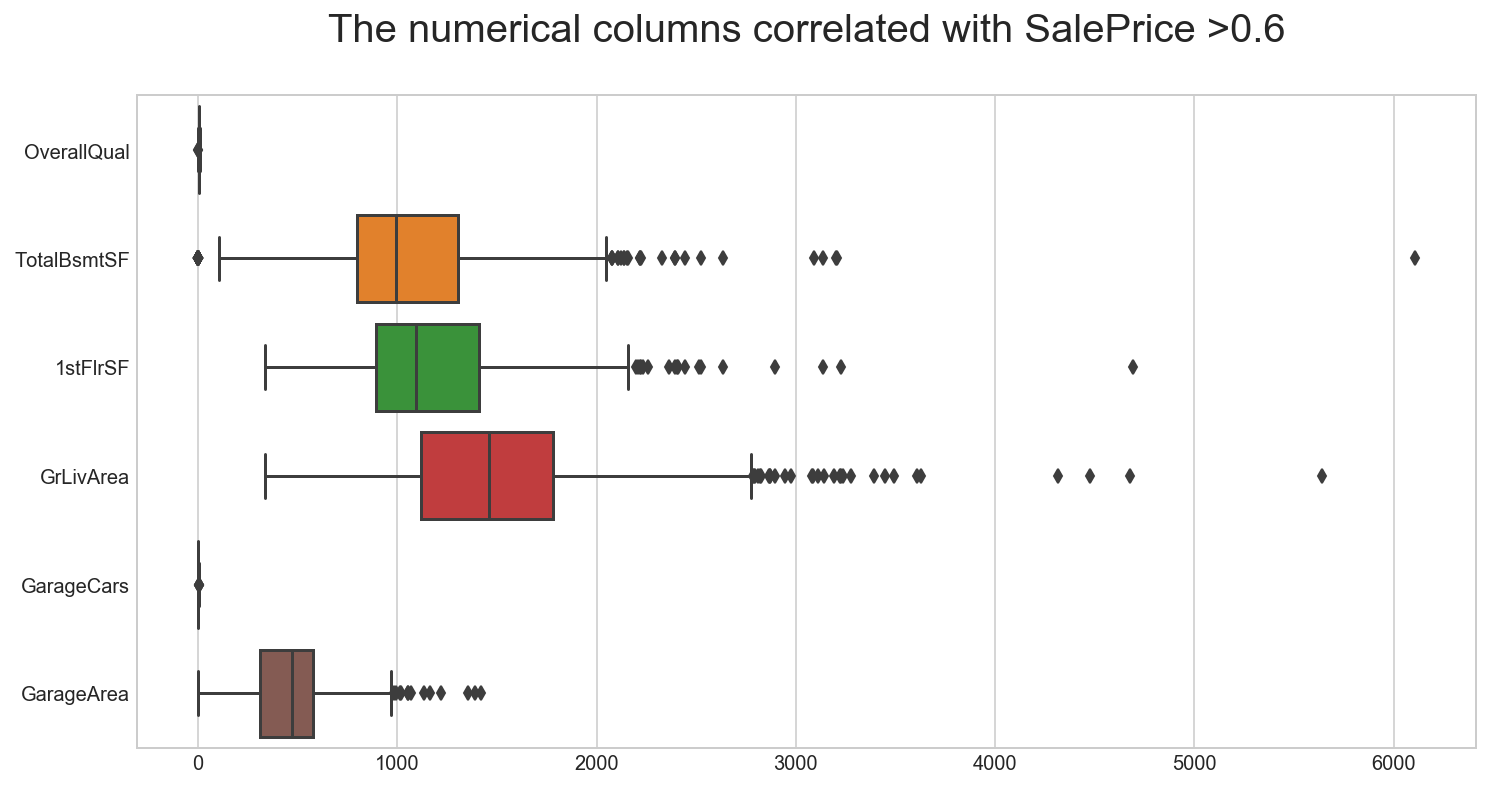

In [47]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=houser[corr60list], orient='h')

ax.set_title('The numerical columns correlated with SalePrice >0.6\n',fontsize=20)
plt.show()

In [32]:
sale_corr60=corr60list
sale_corr60.append('SalePrice')

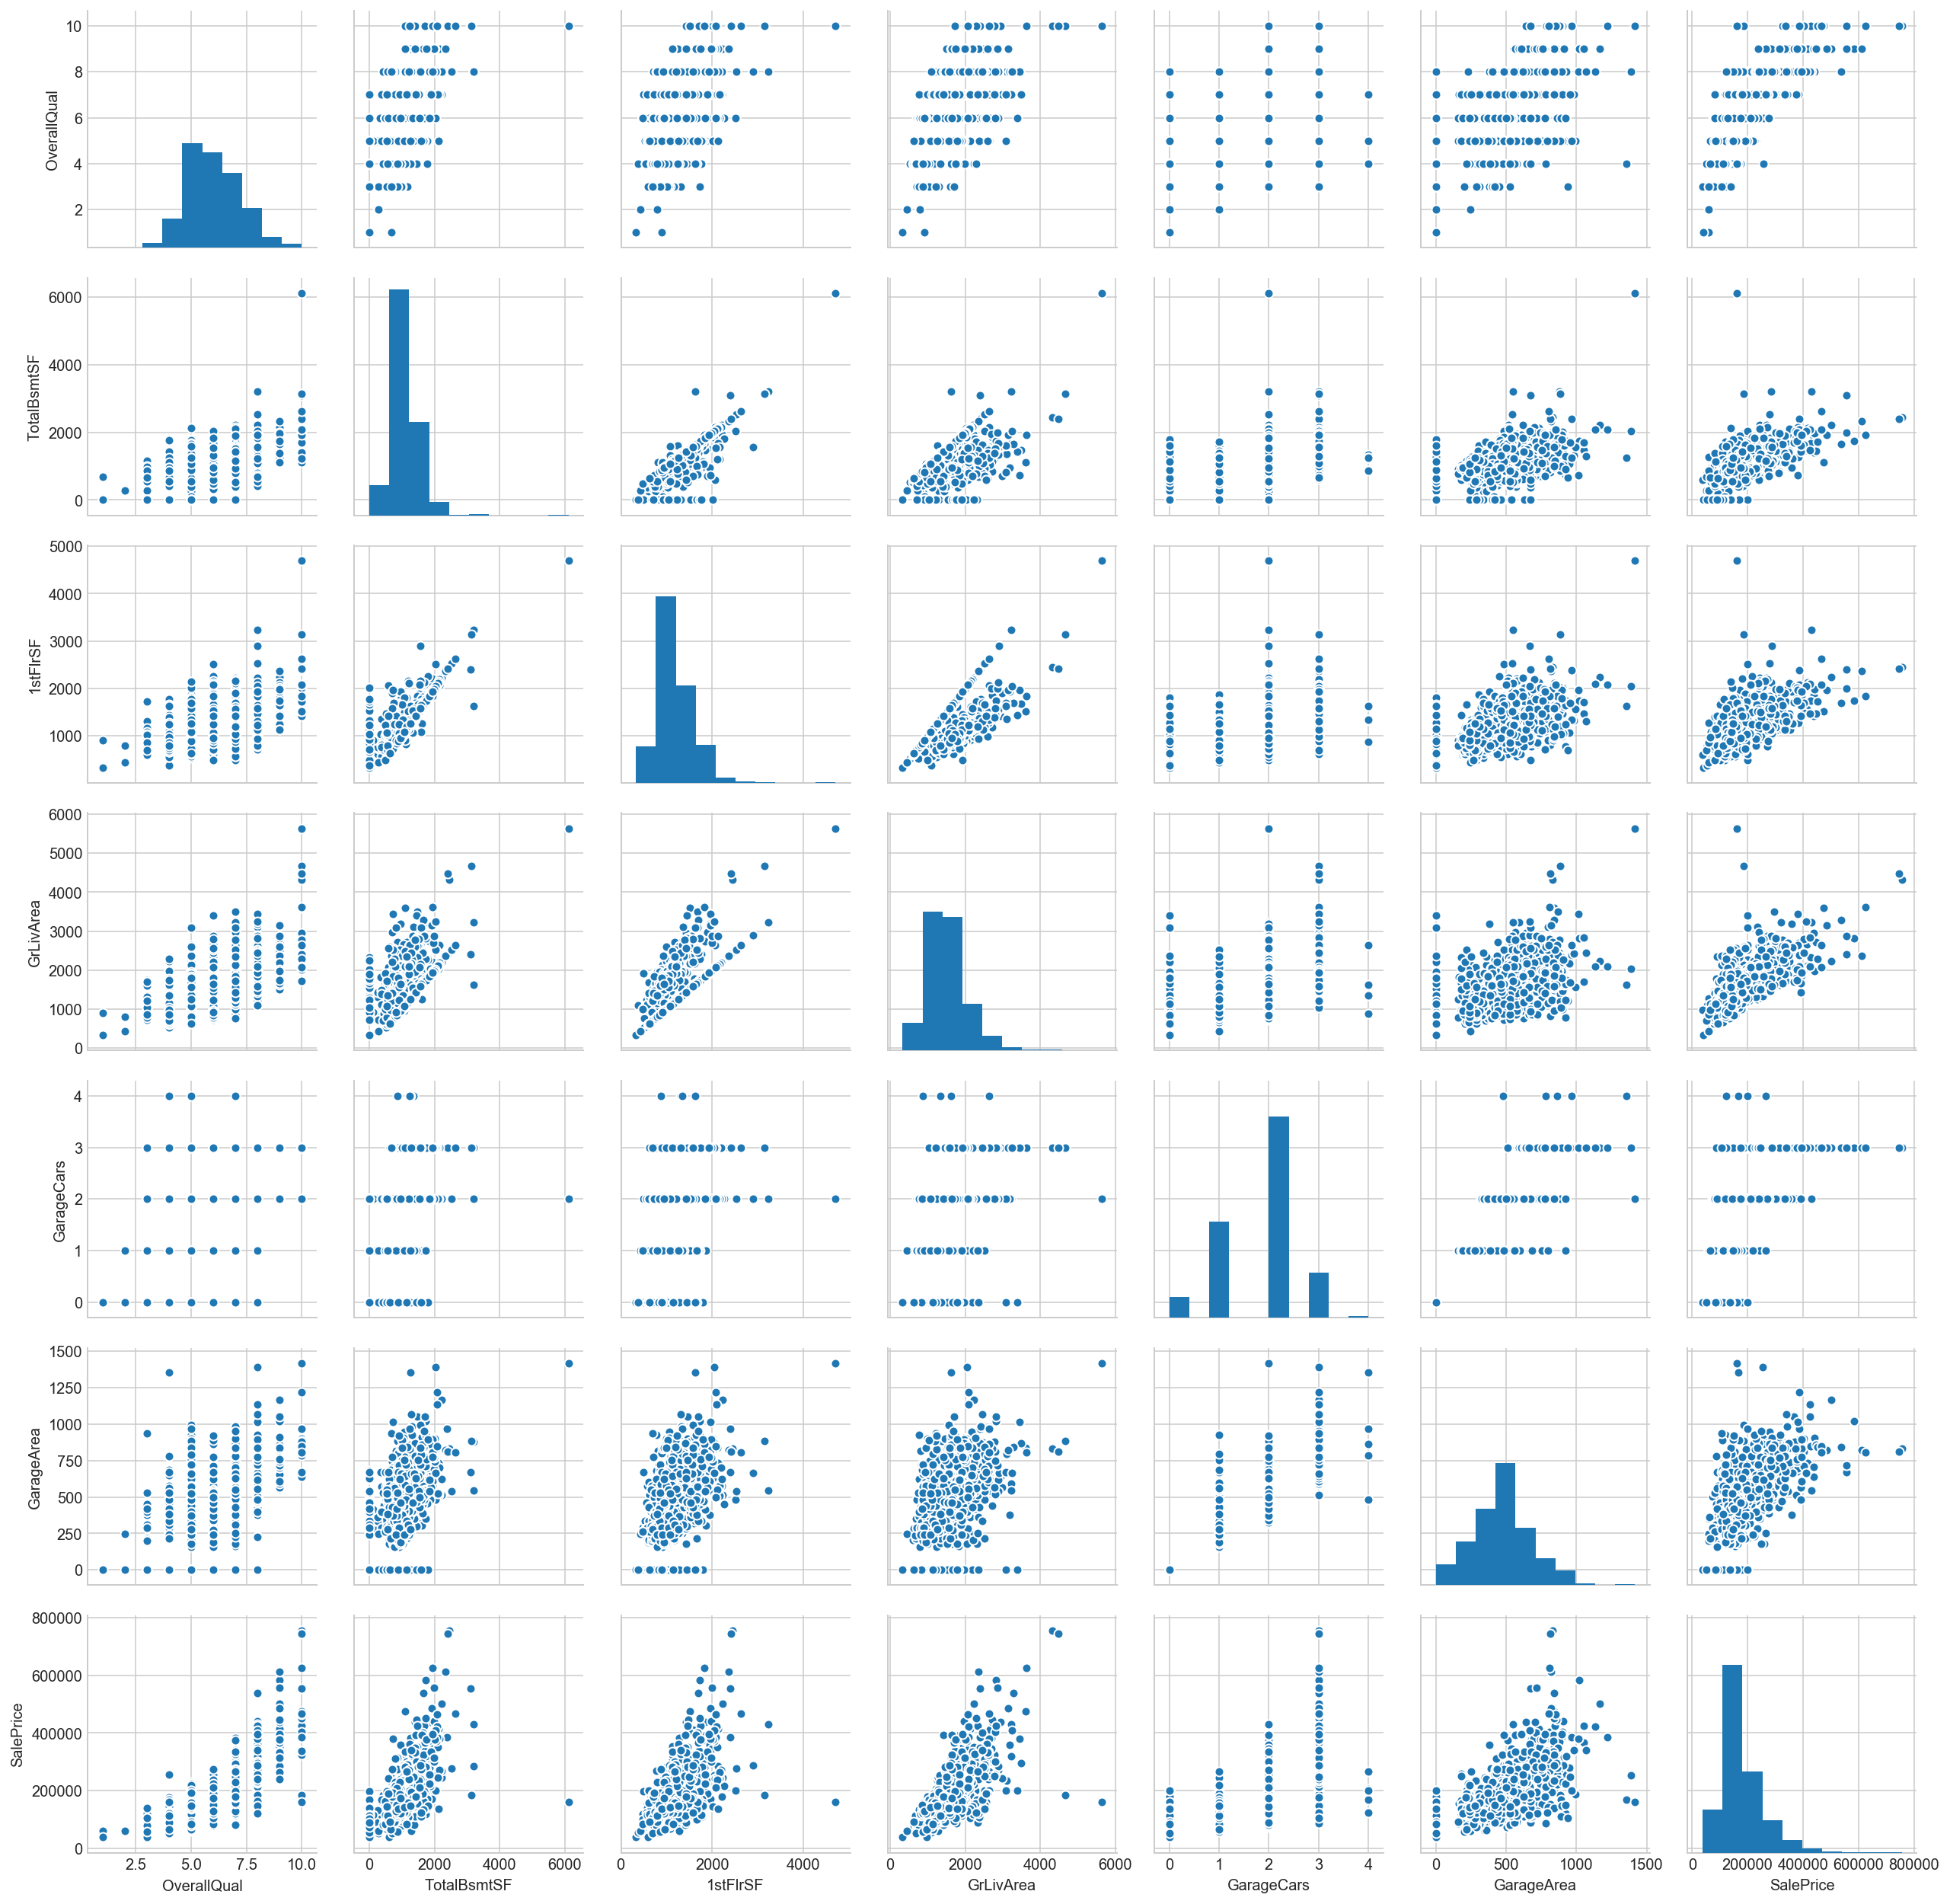

In [33]:
sns.pairplot(houser[sale_corr60])

In [35]:
house_pre2010=houser[houser.YrSold<2010]     #dataset of houses sold before 2010 as training data

In [36]:
house_2010=houser[houser.YrSold==2010]       #dataset of houses sold in 2010 as testing data

In [37]:
y_pre2010=house_pre2010['SalePrice']

In [38]:
y_2010=house_2010['SalePrice']

In [39]:
house_pre2010.YrSold.unique()

array([2008, 2007, 2006, 2009], dtype=int64)

In [40]:
house_pre2010.shape

(1221, 77)

In [41]:
house_2010.YrSold.unique()

array([2010], dtype=int64)

In [42]:
house_2010.shape

(164, 77)

----------SLR---------
the correlation between 'OverallQual' and 'SalePrice' is strongest (0.79),'GrLivArea' is the 2nd (0.71). Therefore to choose these two features to fit a simple linear regression model using pre2010 data and test on 2010 data

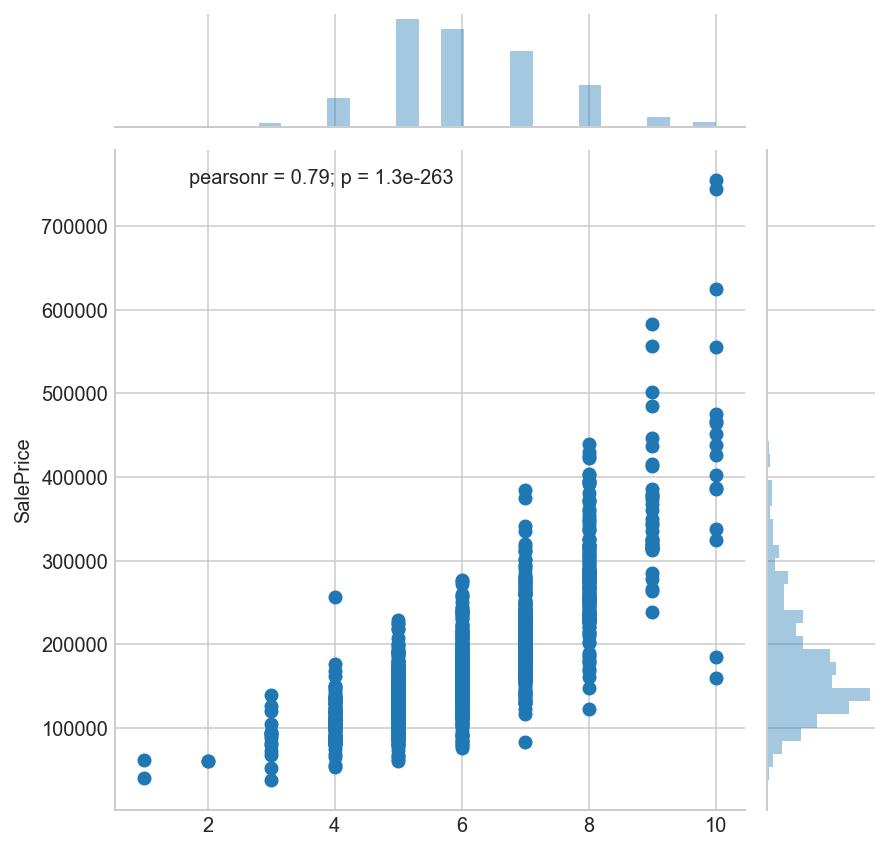

In [43]:
sns.jointplot(house_pre2010.OverallQual.values, y_pre2010)

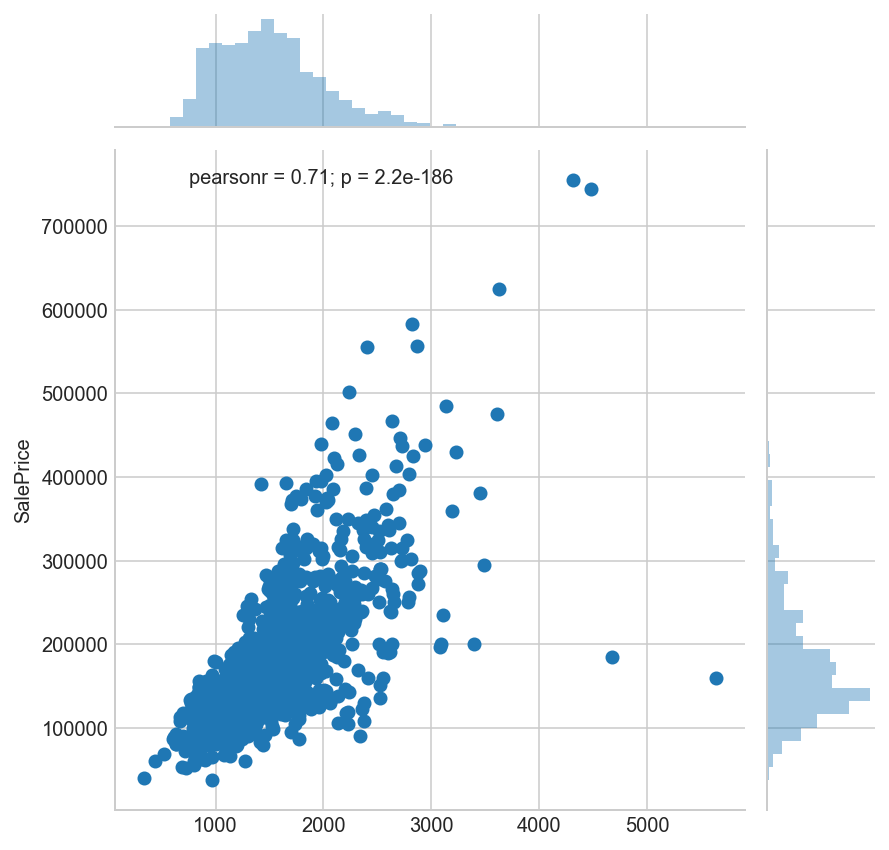

In [44]:
sns.jointplot(house_pre2010.GrLivArea.values, y_pre2010)

In [45]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [46]:
lm = linear_model.LinearRegression()

X =house_pre2010[['OverallQual']]
y = y_pre2010

model = lm.fit(X, y)

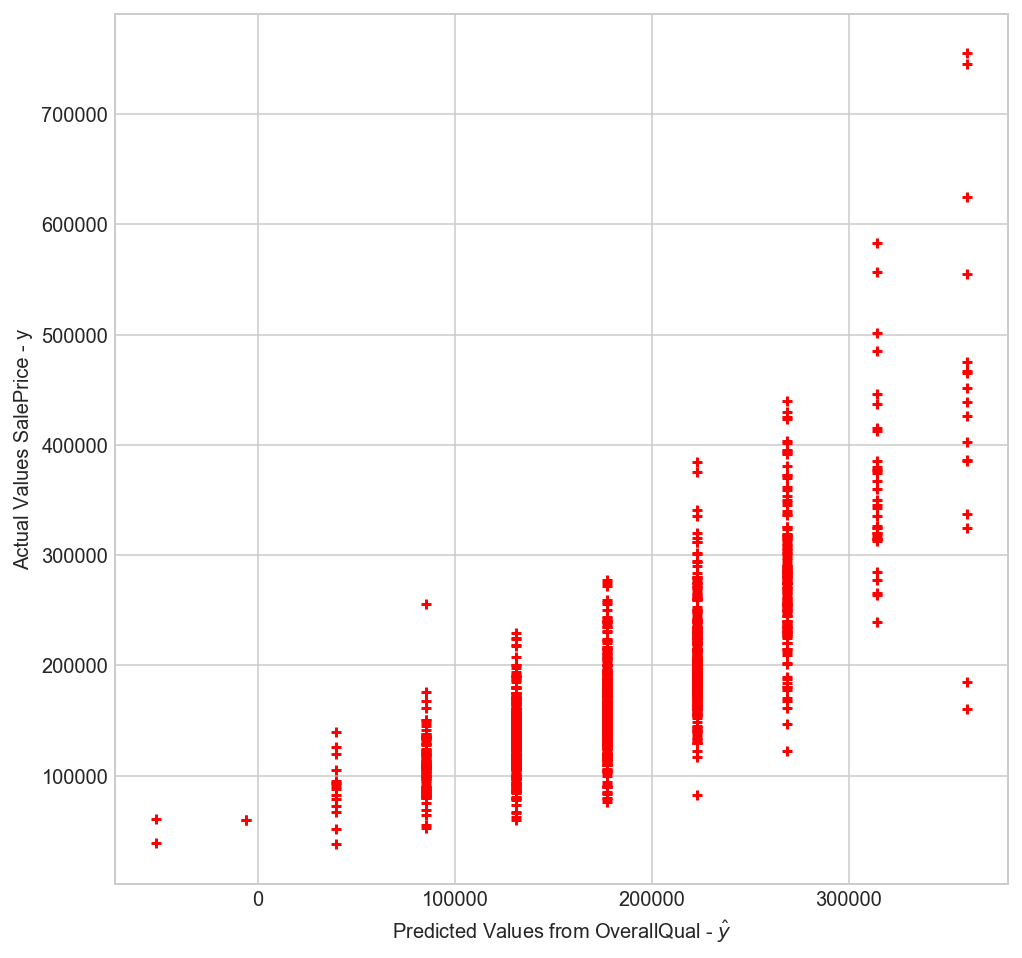

score:  0.6274463076286312


In [47]:
predictions  =  model.predict(X)      # use the fitted model to predict data before 2010
score        =  model.score(X, y)
summary=[]
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from OverallQual - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y")
plt.show()
summary.append('SLR on OverallQual:')
summary.append('training data score:      '+str(score))
#print(summary)
print("score: ", score)

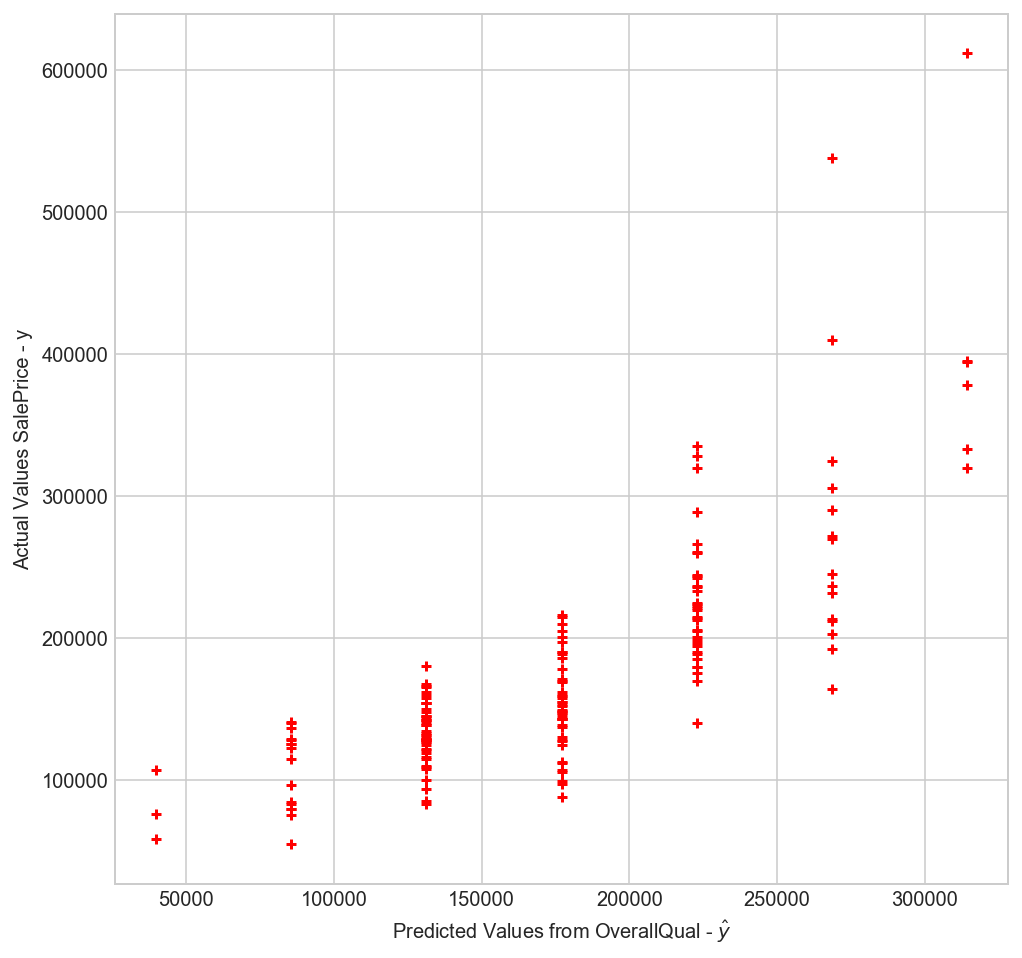

score:  0.6121988338807782


In [48]:
X2010=house_2010[['OverallQual']]
predictions  =  model.predict(X2010)      # use the fitted model to predict data in 2010
score        =  model.score(X2010, y_2010)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_2010, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from OverallQual - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y")
plt.show()
summary.append('test data score:      '+str(score))
#print(summary)
print("score: ", score)

Nice score!!

In [49]:
X =house_pre2010[['GrLivArea']]
y = y_pre2010

model = lm.fit(X, y)

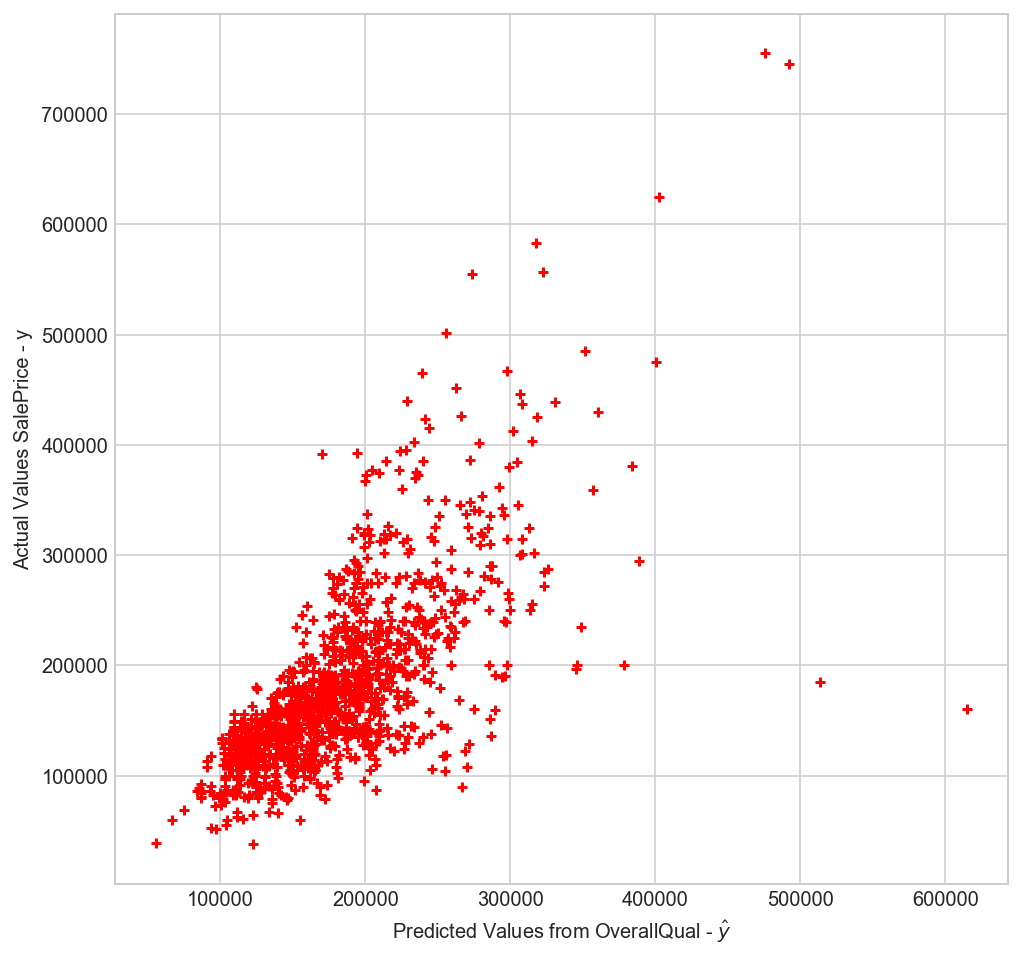

score:  0.501280675082326


In [50]:
predictions  =  model.predict(X)      # use the fitted model to predict data before 2010
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from OverallQual - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y")
plt.show()
summary.append('SLR on GrLivArea:')
summary.append('training data score:      '+str(score))
#print(summary)
print("score: ", score)

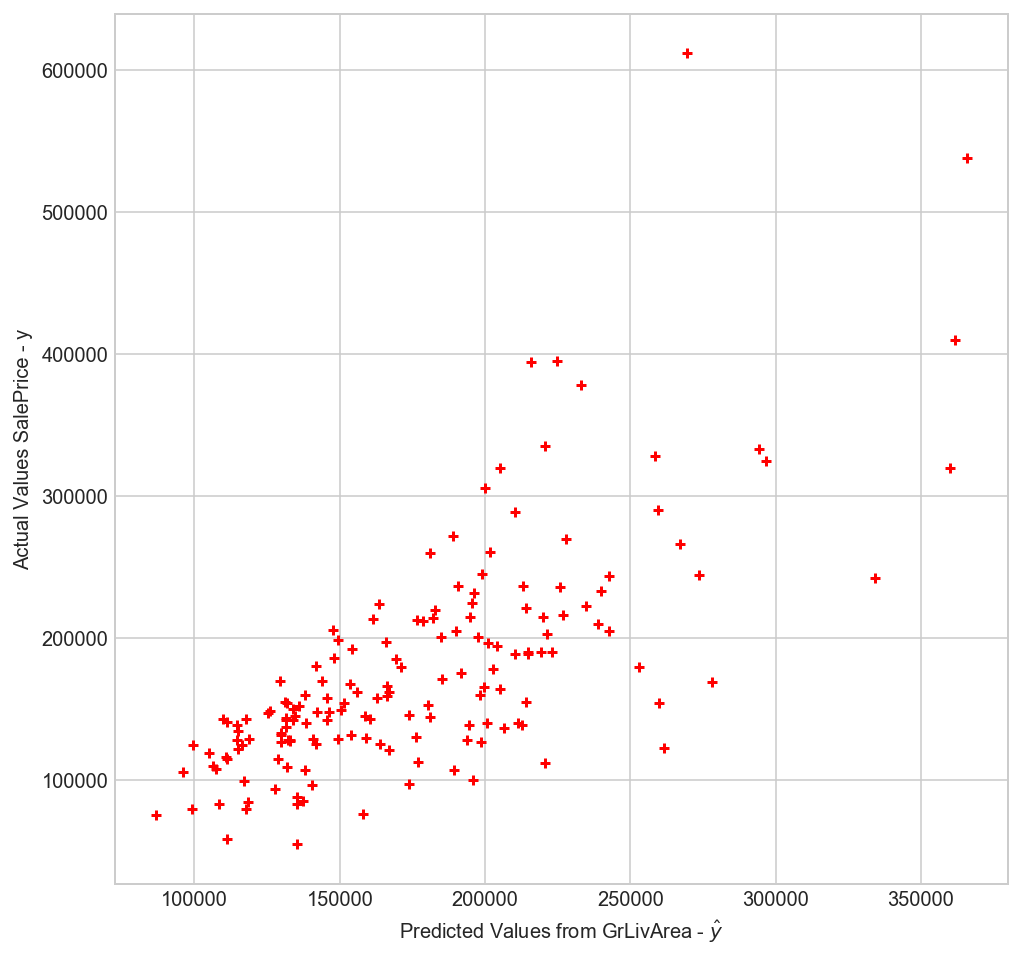

score:  0.5062220599015225


In [51]:
X2010=house_2010[['GrLivArea']]
predictions  =  model.predict(X2010)      # use the fitted model to predict data in 2010
score        =  model.score(X2010, y_2010)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_2010, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from GrLivArea - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y")
plt.show()
summary.append('test data score:      '+str(score))
#print(summary)
print("score: ", score)

both worse than SLR on 'OverallQual'

--------MLR--------on two features (strongly correlated to 'SalePrice')

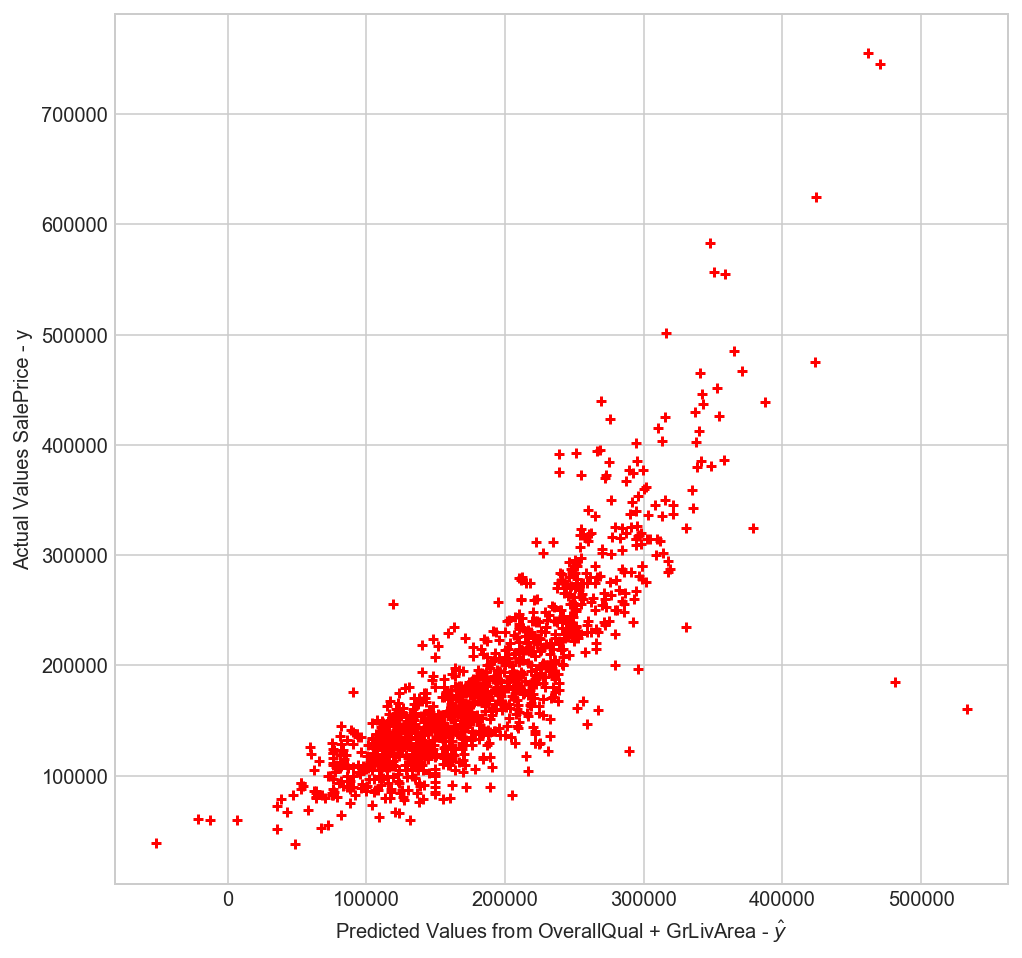

score:  0.7114342503500792


In [52]:
lm = linear_model.LinearRegression()

X = house_pre2010[['OverallQual','GrLivArea']].values
y = y_pre2010 

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from OverallQual + GrLivArea - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y")
plt.show()
summary.append('MLR on OverallQual+GrLivArea:')
summary.append('training data score:      '+str(score))
#print(summary)
print("score: ", score)

The best score so far

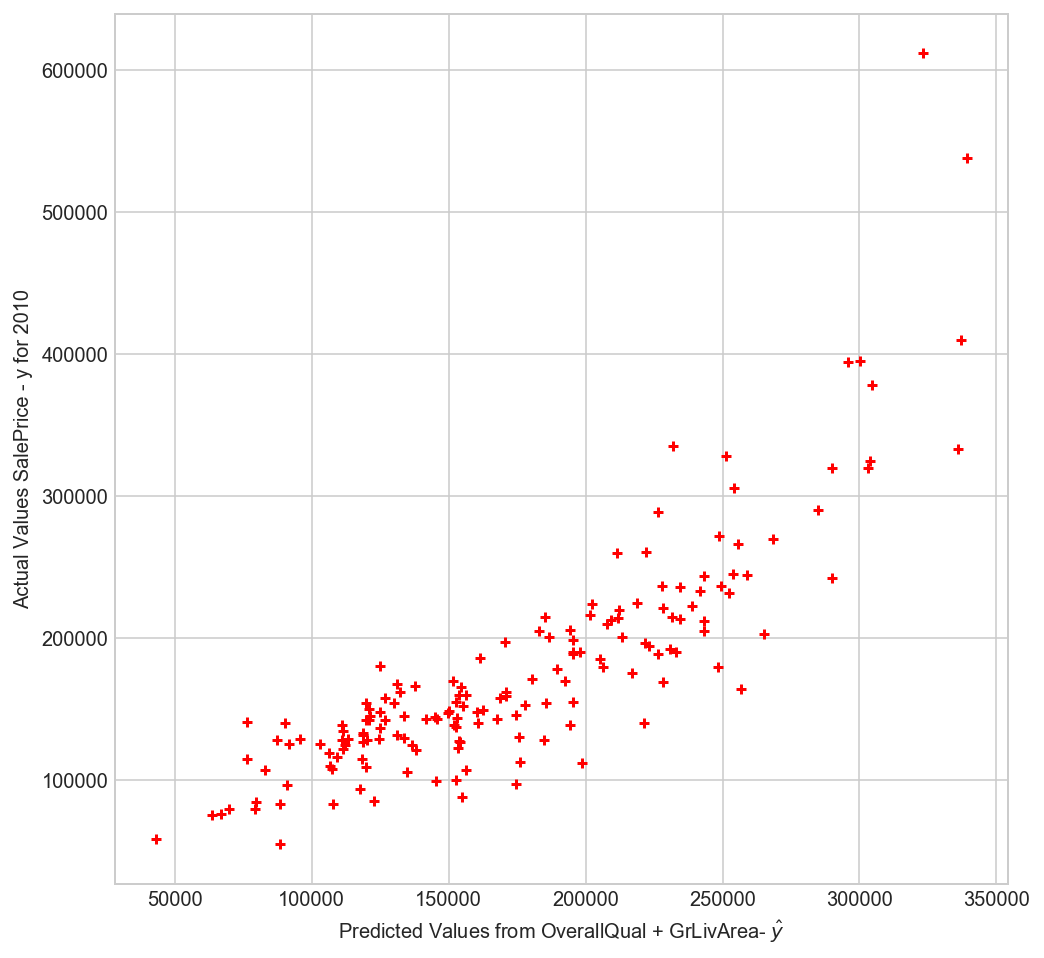

score:  0.711295798262723


In [53]:
X = house_2010[['OverallQual','GrLivArea']].values #to predict 2010 data
y=y_2010
predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from OverallQual + GrLivArea- $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y for 2010")
plt.show()
summary.append('test data score:      '+str(score))
#print(summary)
print("score: ", score)

MLR  ---introducing feature regularization


In [56]:
#print(nlist)


In [57]:
newlist=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 
         'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
         'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
         'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [58]:
#prepare data

X = houser[newlist]    #select all the numerical columns except 'Lotfrontage','GarageYrBlt','MasVnrArea' that were removed
#due to data missing in these columns and they were unimportant(identified by the correlation coefficient)
y_pre2010 = house_pre2010['SalePrice']
y_2010=house_2010['SalePrice']

In [59]:
list2010=X[X.YrSold==2010]

list2010.index

Int64Index([  16,   24,   26,   27,   32,   37,   44,   50,   60,   63,
            ...
            1323, 1335, 1343, 1348, 1355, 1365, 1372, 1381, 1382, 1383],
           dtype='int64', length=164)

In [60]:
#to introduce Ridge,Lasso,ElasticNet regularization
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


In [61]:
# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)

In [62]:
#to separate data before 2010 and in 2010
Xs_pre2010=[]
Xs_2010=[]
ix=[]
for i in range(len(Xs)):
    if i in list2010.index:
        ix.append(i)
        Xs_2010.append(Xs[i])
    else:
        Xs_pre2010.append(Xs[i])

print(len(Xs_pre2010),len(Xs_2010))
#print(ix)

1221 164


In [63]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xs_pre2010, y_pre2010, cv=10)

print(linreg_scores)
print(np.mean(linreg_scores))

[0.86460727 0.84480786 0.86385938 0.72983069 0.79787987 0.80849891
 0.82744555 0.77891281 0.4952748  0.82671267]
0.7837829817397906


In [64]:
model=linreg.fit(Xs_pre2010,y_pre2010)

predictions  =  model.predict(Xs_pre2010)
score        =  model.score(Xs_pre2010, y_pre2010)
summary.append('MLR on 33 features:')
summary.append('training data score:      '+str(score))
#print(summary)
print(score)  #MLR with almost all the numerical columns: prediction score for training data

0.8025724970284388


In [66]:
predictions  =  model.predict(Xs_2010)
score        =  model.score(Xs_2010, y_2010)
summary.append('test data score:      '+str(score))
#print(summary)
print(score)  #MLR with almost all the numerical columns:prediction score for test data

0.8203628475037619


In [67]:
#introduce Ridge regularization for feature selection
ridge_alphas = np.logspace(0, 5, 200)    #to find the optimal alpha based on training data

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs_pre2010, y_pre2010)

print(optimal_ridge.alpha_)

182.51834943190443


In [68]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xs_pre2010, y_pre2010, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.86282655 0.83577483 0.85861839 0.75189946 0.78532246 0.81587727
 0.86359369 0.77856673 0.50733921 0.83515375]
0.7894972344320583


In [69]:
ridge.fit(Xs_pre2010,y_pre2010)


Ridge(alpha=182.51834943190443, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [70]:
score=ridge.score(Xs_pre2010,y_pre2010)
summary.append('MLR with Ridge Regularization')
summary.append('training data score:      '+str(score))
#print(summary)

In [71]:
score=ridge.score(Xs_2010,y_2010)  #no better than including almost all the columns
summary.append('test data score:      '+str(score))

In [72]:
#to introduce Lasso regularization
optimal_lasso = LassoCV(n_alphas=500, cv=10) #to find the optimal alpha for Lasso based on training data
optimal_lasso.fit(Xs_pre2010, y_pre2010)

print(optimal_lasso.alpha_)

614.4967222508067


In [73]:
lasso = Lasso(alpha=optimal_lasso.alpha_) #to test Lasso regularization 

lasso_scores = cross_val_score(lasso, Xs_pre2010, y_pre2010, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.86359648 0.84398719 0.86743481 0.73705987 0.79212731 0.80814966
 0.84115215 0.77556525 0.49303237 0.83688   ]
0.7858985090378138


In [74]:
lasso.fit(Xs_pre2010,y_pre2010)
score=lasso.score(Xs_pre2010,y_pre2010)
summary.append('MLR with Lasso Regularization')
summary.append('training data score:      '+str(score))
score=lasso.score(Xs_2010,y_2010)
summary.append('test data score:      '+str(score))

In [75]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,abs_coef,coef,variable
2,26572.968229,26572.968229,OverallQual
13,26013.467385,26013.467385,GrLivArea
4,8834.792596,8834.792596,YearBuilt
22,8047.490549,8047.490549,GarageCars
0,6032.617976,-6032.617976,MSSubClass
18,5050.451698,-5050.451698,BedroomAbvGr
14,4575.482617,4575.482617,BsmtFullBath
3,4330.997131,4330.997131,OverallCond
6,3920.070185,3920.070185,BsmtFinSF1
20,3751.920734,3751.920734,TotRmsAbvGrd


In [76]:
#to instroduce Elastic Net regularization
# to find the optimal alpha and l1_ratio
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
optimal_enet.fit(Xs_pre2010, y_pre2010)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

634.6694980392053
1.0


In [77]:
#Cross-validate the ElasticNet R2 
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xs_pre2010, y_pre2010, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.86346299 0.84389573 0.86731914 0.73716001 0.79191909 0.80795999
 0.84150931 0.77538739 0.49328746 0.83721024]
0.7859111353964401


In [78]:
enet.fit(Xs_pre2010, y_pre2010)
score=enet.score(Xs_pre2010, y_pre2010)
summary.append('MLR with ElasticNet Regularization')
summary.append('training data score:      '+str(score))
score=enet.score(Xs_2010, y_2010)
summary.append('test data score:      '+str(score))
#print(summary)

In [79]:
for i in range(len(summary)):
    if i%3==0:
        print(summary[i])
    else:
        print('      '+summary[i])


SLR on OverallQual:
      training data score:      0.6274463076286312
      test data score:      0.6121988338807782
SLR on GrLivArea:
      training data score:      0.501280675082326
      test data score:      0.5062220599015225
MLR on OverallQual+GrLivArea:
      training data score:      0.7114342503500792
      test data score:      0.711295798262723
MLR on 33 features:
      training data score:      0.8025724970284388
      test data score:      0.8203628475037619
test data score:      0.8203628475037619
      MLR with Ridge Regularization
      training data score:      0.798239036597794
test data score:      0.8190741841538234
      MLR with Lasso Regularization
      training data score:      0.800964986935717
test data score:      0.81913671246579
      MLR with ElasticNet Regularization
      training data score:      0.8008793746489891
test data score:      0.8190425322146951
